In [0]:
# 5.6과 같으나 nn과 cnn만 다름
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [0]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [3]:
mnist_train = dset.MNIST("../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("../", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 27907635.84it/s]                            


Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw


32768it [00:00, 431641.45it/s]
  1%|          | 16384/1648877 [00:00<00:11, 143574.46it/s]

Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw


1654784it [00:00, 7435475.76it/s]                           
8192it [00:00, 177262.82it/s]


Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw
Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw
Processing...
Done!


In [4]:
print(mnist_train.__getitem__(0)[1], mnist_train.__len__())
mnist_test.__getitem__(0)[1], mnist_test.__len__()

5 60000


(7, 10000)

In [0]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

In [0]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(784,300),
            nn.ReLU(),
            nn.Linear(300,100),
            nn.ReLU(),
            nn.Linear(100,10),
            nn.ReLU()
        )       
        
    def forward(self,x):
        out = x.view(batch_size,-1)
        out = self.layer(out)

        return out

In [7]:
# 5.6에서 쓰는 모델
'''class CNN(nn.Module):
  def __init__(self):
    # super는 CNN 클래스의 부모 클래스인 nn.Module을 초기화
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        # 1, 28, 28 -> 16, 28, 28
        nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5),
        nn.ReLU(),
        # 16, 24, 24 -> 32, 20, 20
        nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5),
        nn.ReLU(),
        # 32, 20, 20 -> 32, 10, 10
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        # 32, 10, 10 -> 64, 6, 6
        nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5),
        nn.ReLU(),
        # 64, 3, 3
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(64 * 3 * 3, 100), # 64 * 3 * 3 -> 100
        nn.ReLU(),
           nn.Linear(100, 10) # 100 -> 10
    )

  def forward(self, x):
    out = self.layer(x) # Sequential 연산 차례대로 실행
    out = out.view(batch_size , -1) # 텐서를 batch_size, 나머지로 바꿔줌

    out = self.fc_layer(out)
    return out'''

'class CNN(nn.Module):\n  def __init__(self):\n    # super는 CNN 클래스의 부모 클래스인 nn.Module을 초기화\n    super(CNN, self).__init__()\n    self.layer = nn.Sequential(\n        # 1, 28, 28 -> 16, 28, 28\n        nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5),\n        nn.ReLU(),\n        # 16, 24, 24 -> 32, 20, 20\n        nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5),\n        nn.ReLU(),\n        # 32, 20, 20 -> 32, 10, 10\n        nn.MaxPool2d(kernel_size = 2, stride = 2),\n        # 32, 10, 10 -> 64, 6, 6\n        nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5),\n        nn.ReLU(),\n        # 64, 3, 3\n        nn.MaxPool2d(kernel_size = 2, stride = 2)\n    )\n    self.fc_layer = nn.Sequential(\n        nn.Linear(64 * 3 * 3, 100), # 64 * 3 * 3 -> 100\n        nn.ReLU(),\n           nn.Linear(100, 10) # 100 -> 10\n    )\n\n  def forward(self, x):\n    out = self.layer(x) # Sequential 연산 차례대로 실행\n    out = out.view(batch_size , -1) # 텐서를 batch_si

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Linear().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


In [9]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3029, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7464, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7802, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6784, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6045, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6131, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6261, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6425, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4883, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.5400, device='cuda:0', grad_fn=<NllLossBackward>)


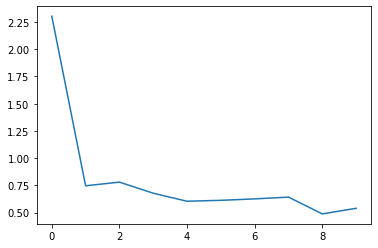

In [12]:
plt.plot(loss_arr)
plt.show()

In [17]:
correct = 0
total = 0

with torch.no_grad():
  for image,label in test_loader:
      x = image.to(device)
      y_= label.to(device)

      output = model.forward(x)
      _,output_index = torch.max(output,1)

      total += label.size(0)
      correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {}".format(100*correct/total))

Accuracy of Test Data: 77.19351196289062
